<a href="https://colab.research.google.com/github/theachyuttiwari/soil-liquefaction/blob/main/Achyut_Soil_Liqui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.interpolate import interp1d
from sklearn import metrics, preprocessing, linear_model
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn  import model_selection
from sklearn.model_selection import train_test_split,learning_curve, cross_val_score,cross_val_predict,cross_validate
from sklearn.preprocessing import minmax_scale
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn  import model_selection
from sklearn.utils import shuffle
from IPython.display import Image, display
import time
# seed_pi = 3141592
seed_pi= 9
np.random.seed(seed_pi)#sets random seed

# Inputing Dataset

In [ ]:
dataset = pd.read_csv('new_data_only_lichefiere.csv', header=0)
print('Dataset preview:')
display(dataset.head())
print('Dimension =',dataset.shape)

Dataset preview:


,mag,s0,sp0,spt,ag,tau_dinamic,pfine,d50,outcome
0,8.1,222.063617,1085.600000,2.2,0.20,0.19,72.50,0.15,0
1,8.1,193.362733,904.553596,8.9,0.20,0.21,9.67,0.40,0
2,8.1,181.874167,397.331969,3.6,0.20,0.26,19.33,0.20,0
3,7.0,175.397343,631.084173,6.5,0.40,0.31,0.00,0.40,0
4,7.0,579.770158,2220.010000,20.6,0.35,0.23,NaN,0.50,0


Dimension = (210, 9)


In [ ]:
# Dataframe to numpy array, scalling of the input features
X = dataset.values[:,0:8]
Y = dataset.values[:,8]
# scaler_x = StandardScaler()
scaler_x = MinMaxScaler()
X_scalled = scaler_x.fit_transform(X)
X_train, X_test, Y_train, Y_test = X_scalled[:59], X_scalled[59:], Y[:59], Y[59:]

# Dataset Visualisation

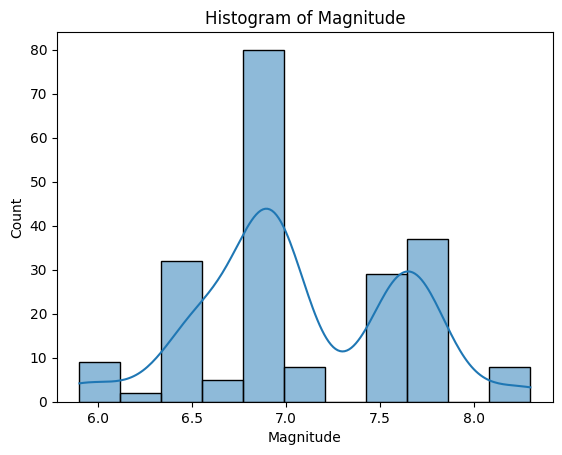

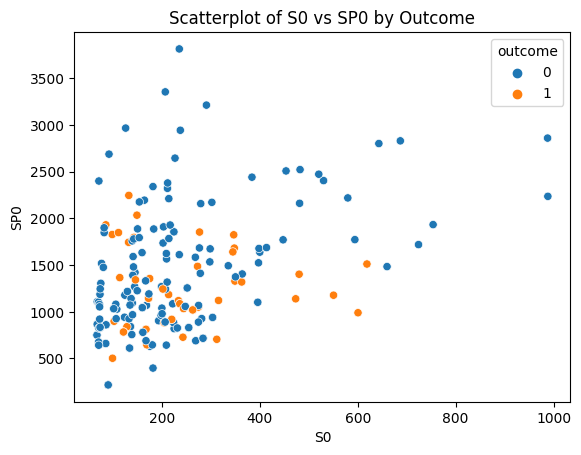

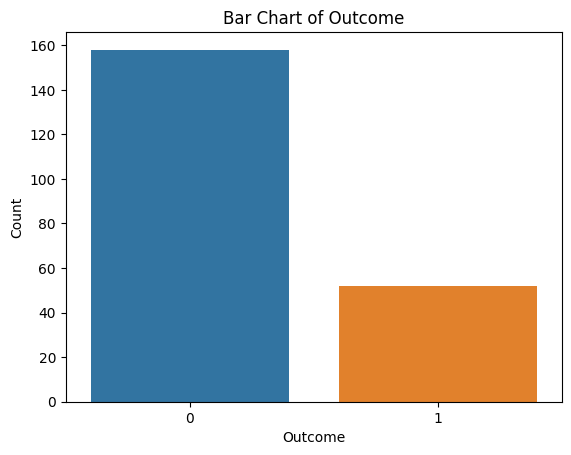

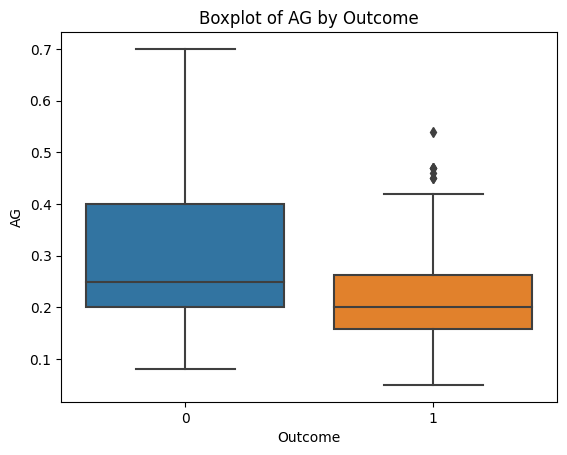

<ipython-input-9-f4bf5467109e>:37: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


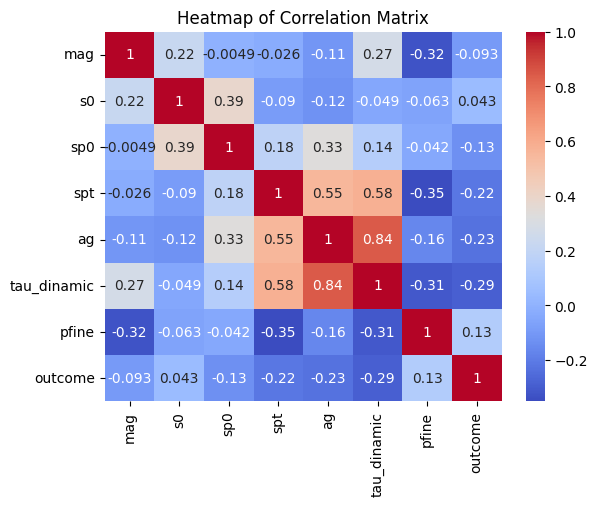

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data into a pandas DataFrame
df = pd.read_csv('new_data_only_lichefiere.csv')

# Plot a histogram of a numerical column
sns.histplot(df['mag'], kde=True)
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.title('Histogram of Magnitude')
plt.show()

# Plot a scatterplot of two numerical columns
sns.scatterplot(data=df, x='s0', y='sp0', hue='outcome')
plt.xlabel('S0')
plt.ylabel('SP0')
plt.title('Scatterplot of S0 vs SP0 by Outcome')
plt.show()

# Plot a bar chart of a categorical column
sns.countplot(data=df, x='outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Bar Chart of Outcome')
plt.show()

# Plot a boxplot of a numerical column by a categorical column
sns.boxplot(data=df, x='outcome', y='ag')
plt.xlabel('Outcome')
plt.ylabel('AG')
plt.title('Boxplot of AG by Outcome')
plt.show()

# Plot a heatmap of a correlation matrix
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


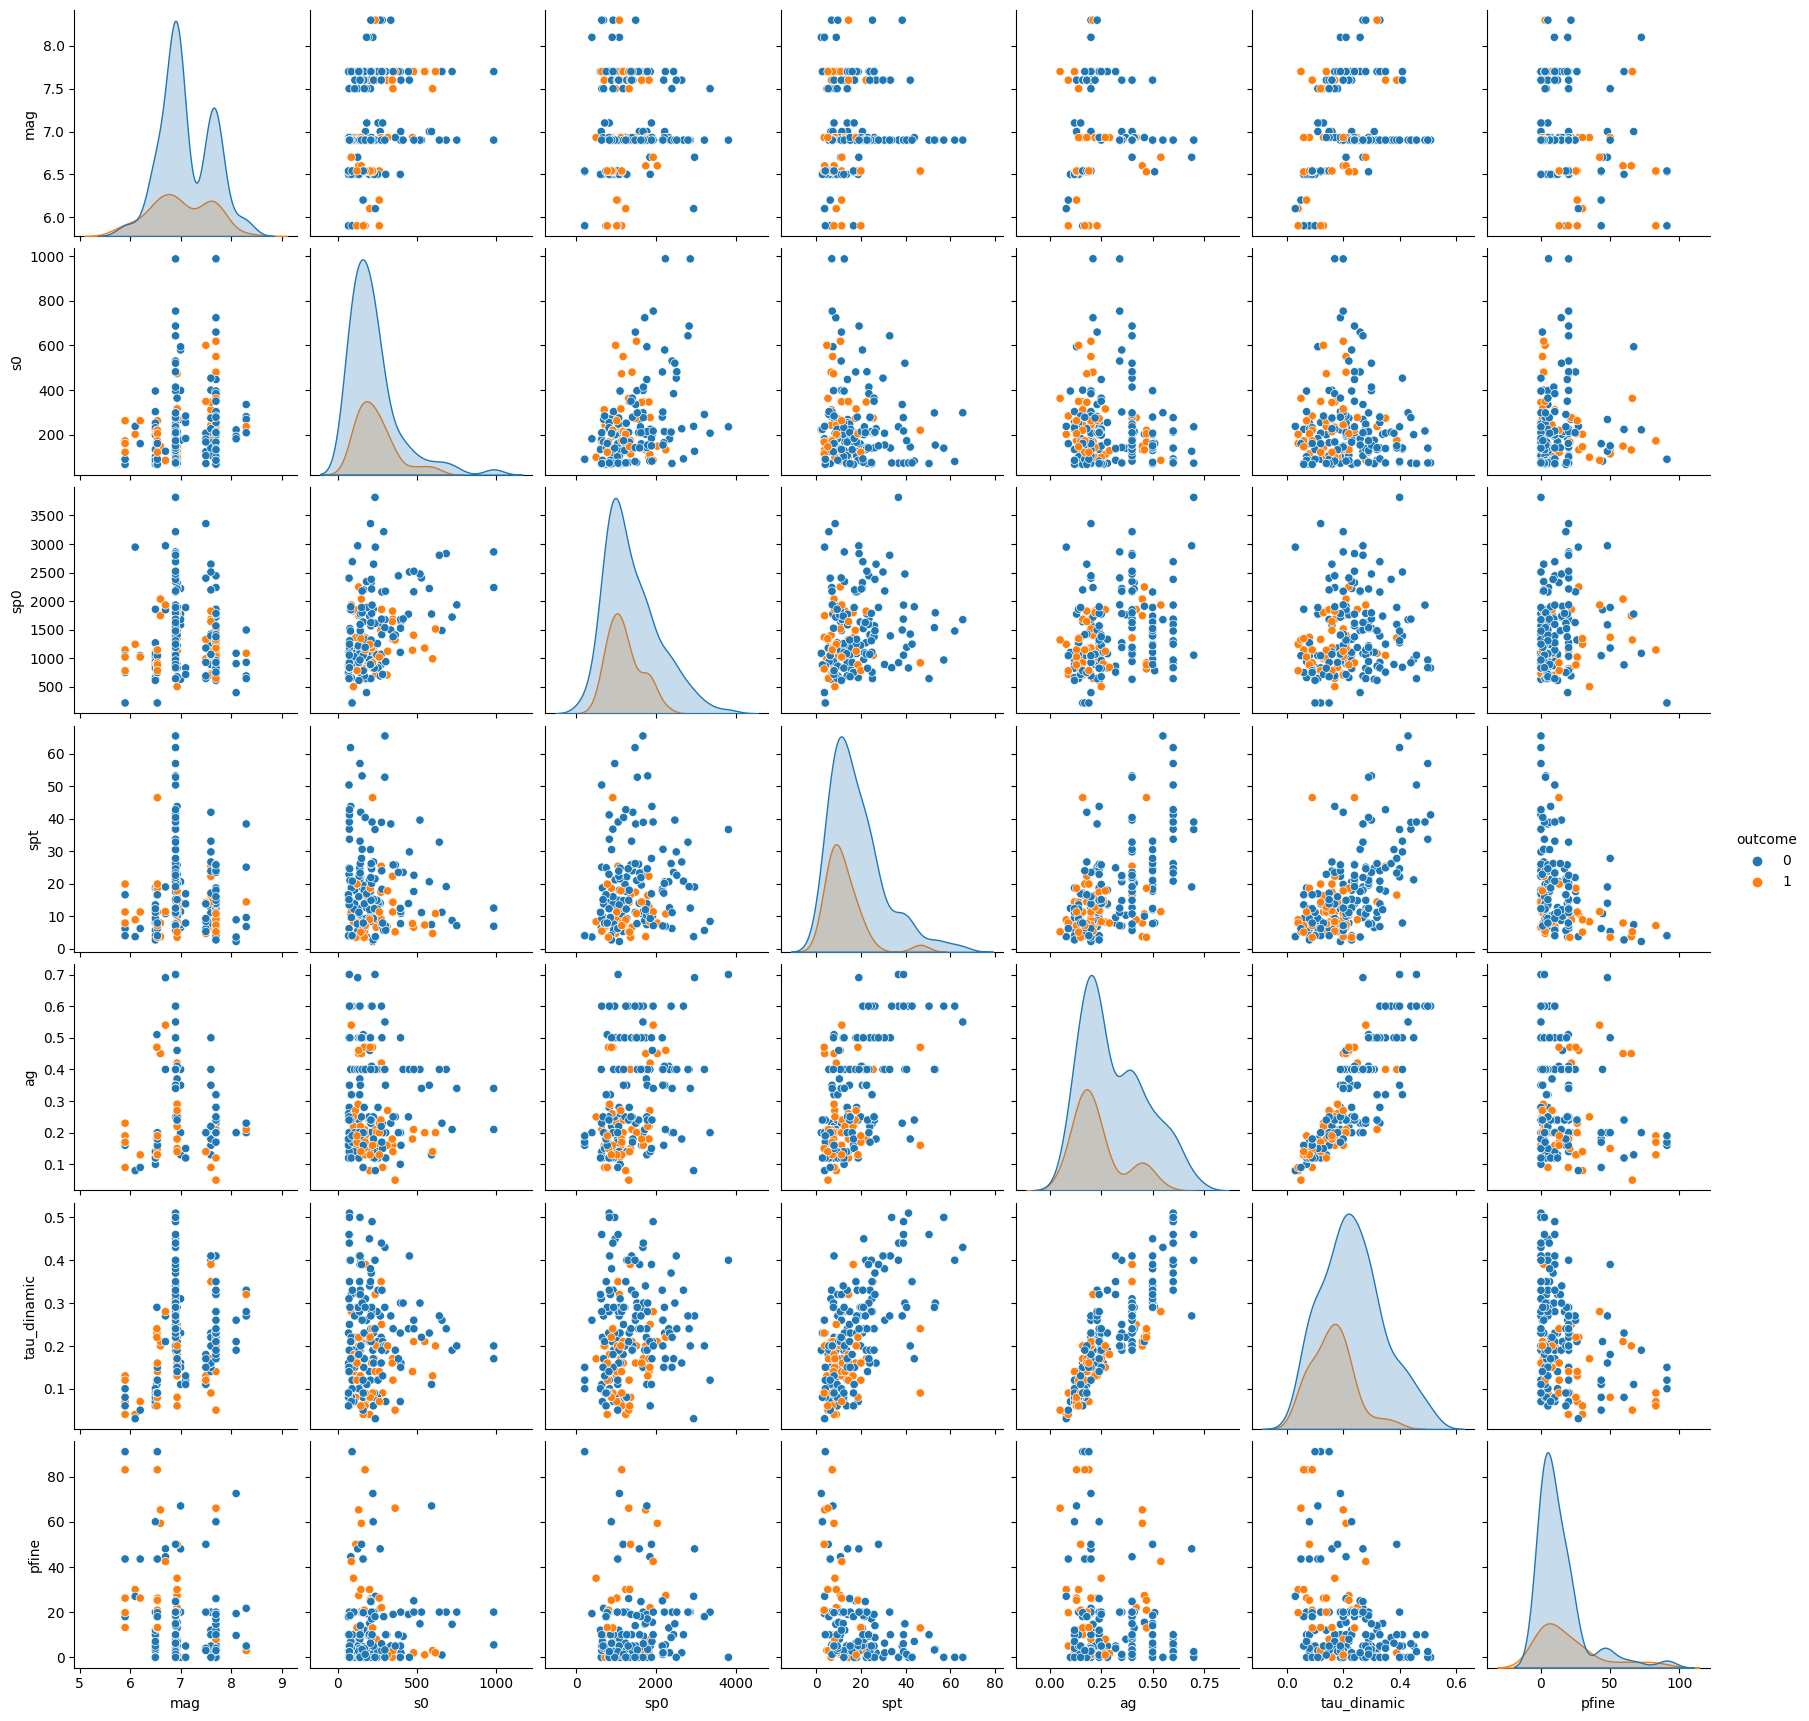

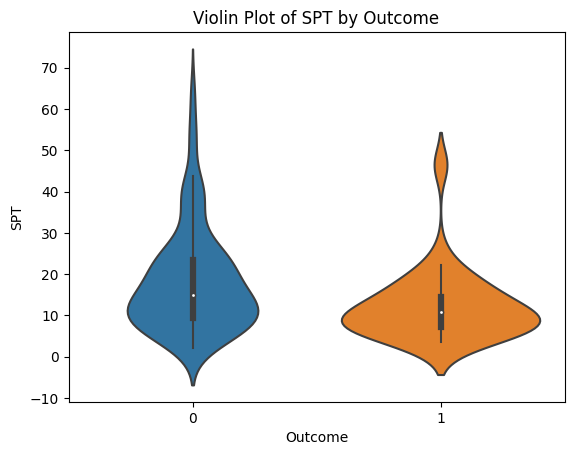

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 86.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 84.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 66.7% of the points cannot be placed; y

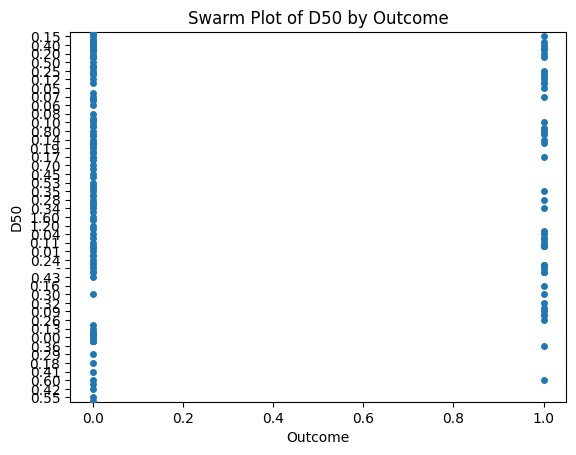

NameError: ignored

In [ ]:
# Load data into a pandas DataFrame
df = pd.read_csv('new_data_only_lichefiere.csv')

# Plot a pairplot to visualize relationships between variables
sns.pairplot(data=df, hue='outcome')
plt.show()

# Plot a violin plot to visualize the distribution of a numerical column by a categorical column
sns.violinplot(data=df, x='outcome', y='spt')
plt.xlabel('Outcome')
plt.ylabel('SPT')
plt.title('Violin Plot of SPT by Outcome')
plt.show()

# Plot a swarm plot to visualize the distribution of a numerical column by a categorical column
sns.swarmplot(data=df, x='outcome', y='d50')
plt.xlabel('Outcome')
plt.ylabel('D50')
plt.title('Swarm Plot of D50 by Outcome')
plt.show()

# Plot a confusion matrix to visualize model performance
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(6,6), class_names=labels)
plt.title('Confusion Matrix')
plt.show()

# Plot a ROC curve to visualize model performance
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_probas[:,1])
roc_auc = roc_auc_score(y_test, y_probas[:,1])
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
plt.subplots(figsize=(8, 5))
sns.heatmap(dataset.corr(), annot=True, cmap="RdYlGn")
plt.show()

 **Splitting Dataset**

In [ ]:
# Dataframe to numpy array, scalling of the input features
X = dataset.values[:,0:8]
Y = dataset.values[:,8]
# scaler_x = StandardScaler()
scaler_x = MinMaxScaler()
X_scalled = scaler_x.fit_transform(X)
X_train, X_test, Y_train, Y_test = X_scalled[:59], X_scalled[59:], Y[:59], Y[59:]

ValueError: ignored

In [ ]:
X = dataset.values[:,0:8]
Y = dataset.values[:,8]
scaler_x = MinMaxScaler()
X_scalled = scaler_x.fit_transform(X)
X_train, X_test, Y_train, Y_test = X_scalled[:168], X_scalled[168:], Y[:168], Y[168:]


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset into a pandas dataframe
dataset = pd.read_csv('new_data_only_lichefiere.csv')

# Replace '-' with NaN in the dataframe
dataset = dataset.replace('-', np.nan)

# Extract the input features and target variable from the dataframe
X = dataset.values[:,0:8]
Y = dataset.values[:,8]

# Scale the input features using MinMaxScaler
scaler_x = MinMaxScaler()
X_scalled = scaler_x.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = X_scalled[:168], X_scalled[168:], Y[:168], Y[168:]



# Multiperceptron

In [ ]:
start_time = time.time()
model_goh=MLPClassifier(hidden_layer_sizes=(8,), max_iter=30000,learning_rate='constant', activation='logistic',
                        learning_rate_init=0.1, momentum=0.075, solver= "sgd", batch_size=59, shuffle=False, tol=1e-5, random_state=seed_pi)
model_goh.fit(X_train, Y_train)
results = model_goh.predict(X_test)
plt.plot(Y_test, "ro", markersize=15,label="Observed")
plt.plot(results, "+", markersize=15, label="Predicted MLP")
plt.legend()
plt.title("Model results / R2_test="+str(round(model_goh.score(X_test,Y_test),3)))
plt.show();
plt.clf()
plt.close('all')
print("Training time =  %0.1f seconds" % (time.time() - start_time))

ValueError: ignored

**Learning Curve**

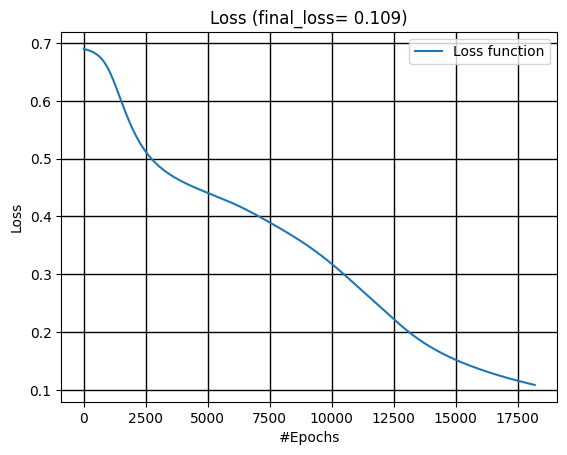

In [ ]:
plt.plot(model_goh.loss_curve_, label='Loss function')
plt.title('Loss (final_loss= %0.3f)'%model_goh.loss_)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xlabel('#Epochs')
plt.ylabel('Loss')
plt.axis('tight')
plt.legend();

#Model accuracy for training, testing and full dataset
Coefficient of determination  𝑅2  formula
Mean of the observed values:  𝑦¯=1𝑛∑𝑛𝑖=1𝑦𝑖

𝑆𝑆tot=∑𝑖(𝑦𝑖−𝑦¯)2  ,  𝑆𝑆res=∑𝑖(𝑦𝑖−𝑓𝑖)2=∑𝑖𝑒2𝑖 , where  𝑓𝑖  are predicted values

𝑅2≡1−𝑆𝑆res𝑆𝑆tot=1−∑(𝑒2𝑖)∑(𝑦𝑖−𝑦¯)2

In [ ]:
print('Training R2= %0.3f    Loss= %0.3f' % (model_goh.score(X_train, Y_train), model_goh.loss_))
print('Testing  R2= %0.3f' % model_goh.score(X_test, Y_test))
print('Overall  R2= %0.3f' % model_goh.score(X_scalled, Y))

Training R2= 0.983    Loss= 0.109
Testing  R2= 0.923
Overall  R2= 0.965


**Liquefaction probability**

In [ ]:
y_prediction_all_prob = model_goh.predict_proba(X_scalled)[:,1]
y_prediction_all = model_goh.predict(X_scalled)
dataset['prediction_probability']= y_prediction_all_prob
dataset['prediction_binary']= y_prediction_all
display(dataset.head())
dataset.to_csv("dataset_p.csv")

,mag,s0,sp0,spt,ag,tau_dinamic,pfine,d50,outcome,prediction_probability,prediction_binary
0,7.9,186.4,96.1,20.0,0.32,0.36,0,0.46,1,0.990639,1.0
1,7.9,130.5,81.4,10.0,0.32,0.32,5,0.28,1,0.999957,1.0
2,7.9,111.8,71.6,17.0,0.28,0.28,3,0.80,1,0.977944,1.0
3,7.9,93.2,67.7,13.0,0.28,0.25,4,0.60,1,0.998791,1.0
4,7.9,122.6,93.2,10.0,0.20,0.16,10,0.25,1,0.749734,1.0


### Particular cases
#### In study was studied the liquefaction of the soil as a function of SPT value and the percent of fine particles.
The granulomery of the soil (d50) was determined as function of the precent of fine particles (pfine) using the following interpolation points:

,pfine,d50
0,0.0,0.45
1,5.0,0.35
2,10.0,0.25
3,15.0,0.23
4,20.0,0.20
5,25.0,0.10


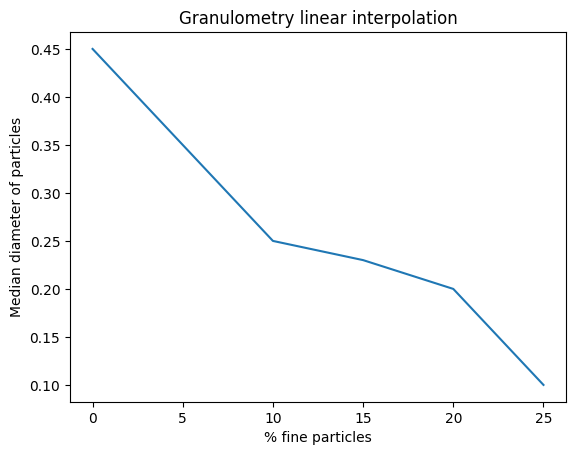

In [ ]:
pfine_int = np.array([0,5,10,15,20,25])
d50_int = np.array([0.45,0.35,0.25,0.23,0.2,0.1])
df_d50=pd.DataFrame(np.c_[pfine_int,d50_int],columns=['pfine','d50'])
display(df_d50)
f = interp1d(pfine_int, d50_int, kind='cubic',fill_value ='extrapolate')
plt.title('Granulometry linear interpolation')
plt.xlabel('% fine particles')
plt.ylabel('Median diameter of particles')
plt.plot(pfine_int,d50_int, ls='-');

#### Particular case 1.
##### mag=7.5 / s0=function of(sp0,tau_dinamic,ag,mag,z) / sp0=70 / ag=0.2 / tau_dinamic=0.2 / d50=function of(pfine) / z=20m

In [ ]:
mag=7.5
sp0=70
ag=0.1
tau_dinamic=0.1
z=20
s0=sp0*tau_dinamic/0.1/ag/(mag-1)/(1-0.015*z)
df=dataset.copy()
df['mag'] = mag
df['s0'] = s0
df['sp0'] = sp0
df['ag'] = ag
df['tau_dinamic'] = tau_dinamic
df['d50'] = f(df['pfine'].values)
df = df.drop(['outcome','prediction_probability','prediction_binary'],axis=1)
X2 = df.values[:,0:8]
X_scalled_2 = scaler_x.transform(X2)
df['prediction_binary'] = model_goh.predict(X_scalled_2)
df.head()


,mag,s0,sp0,spt,ag,tau_dinamic,pfine,d50,prediction_binary
0,7.5,153.846154,70,20.0,0.1,0.1,0,0.450000,0.0
1,7.5,153.846154,70,10.0,0.1,0.1,5,0.350000,0.0
2,7.5,153.846154,70,17.0,0.1,0.1,3,0.397131,0.0
3,7.5,153.846154,70,13.0,0.1,0.1,4,0.374075,0.0
4,7.5,153.846154,70,10.0,0.1,0.1,10,0.250000,0.0


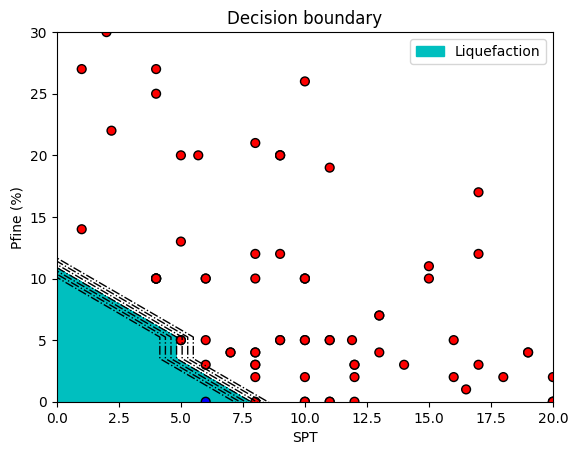

In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
cmap_light = ListedColormap(['w', 'c'])
patch0 = mpatches.Patch(color='w')
patch1 = mpatches.Patch(color='c', label='Liquefaction')

x_min, x_max = X_scalled_2[:,3].min() - 1, X_scalled_2[:,3].max() + 1
y_min, y_max = X_scalled_2[:,6].min() - 1, X_scalled_2[:,6].max() + 1
h = .05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots()

X_fill= np.c_[np.full(len(xx.ravel()), X_scalled_2[0,0]), np.full(len(xx.ravel()),X_scalled_2[0,1]),
                            np.full(len(xx.ravel()), X_scalled_2[0,2]),xx.ravel(),np.full(len(xx.ravel()), X_scalled_2[0,4]),
                            np.full(len(xx.ravel()), X_scalled_2[0,5]),yy.ravel(), f(yy.ravel())]

Z = model_goh.predict(X_fill)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
xx= scaler_x.inverse_transform(X_fill)[:,3].reshape(Z.shape)
yy= scaler_x.inverse_transform(X_fill)[:,6].reshape(Z.shape)
cs=ax.contourf(xx, yy, Z, cmap=cmap_light)
plt.contour(cs, colors='k', linewidths=1,linestyles='dashdot')
# Plot also the training points
categories = np.unique(df['prediction_binary'])
colordict = dict(zip(categories, ['r','b']))
df["Color"] = df['prediction_binary'].apply(lambda x: colordict[x])
ax.scatter(X2[:, 3], X2[:, 6],c=df["Color"], edgecolor='black', s=40)
ax.set_title('Decision boundary')
ax.set_xlabel('SPT')
ax.set_ylabel('Pfine (%)')
ax.set_xlim(0, 20)
ax.set_ylim(0, 30)
ax.legend(handles=[patch1]);

#### Particular case 2.
##### mag=7.5 / s0=f(sp0,tau_dinamic,ag,mag,z) / sp0=70 / ag=0.2 / tau_dinamic=0.2 / d50=f(pfine) / z=20m

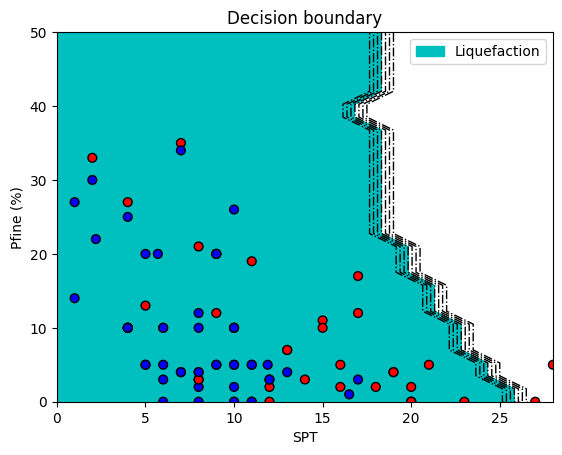

In [ ]:
mag = 7.5
sp0 = 70
ag = 0.2
tau_dinamic = 0.2
z = 20
s0 = sp0 * tau_dinamic / 0.1 / ag / (mag - 1) / (1 - 0.015 * z)

df = dataset.replace({'mag': mag})
df = df.replace({'s0': s0})
df = df.replace({'sp0': sp0})
df = df.replace({'ag': ag})
df = df.replace({'tau_dinamic': tau_dinamic})

df['d50'] = f(df['pfine'].values)
df = df.drop(['outcome', 'prediction_probability', 'prediction_binary'], axis=1)

X2 = df.values[:, 0:8]
X_scalled_2 = scaler_x.transform(X2)
df['prediction_binary'] = model_goh.predict(X_scalled_2)

x_min, x_max = X_scalled_2[:, 3].min() - 1, X_scalled_2[:, 3].max() + 1
y_min, y_max = X_scalled_2[:, 6].min() - 1, X_scalled_2[:, 6].max() + 1
h = .05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots()

X_fill = np.c_[np.full(len(xx.ravel()), X_scalled_2[0, 0]), np.full(len(xx.ravel()), X_scalled_2[0, 1]),
               np.full(len(xx.ravel()), X_scalled_2[0, 2]), xx.ravel(), np.full(len(xx.ravel()), X_scalled_2[0, 4]),
               np.full(len(xx.ravel()), X_scalled_2[0, 5]), yy.ravel(), f(yy.ravel())]

Z = model_goh.predict(X_fill)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
xx_inverse = scaler_x.inverse_transform(X_fill)[:, 3].reshape(Z.shape)
yy_inverse = scaler_x.inverse_transform(X_fill)[:, 6].reshape(Z.shape)
cs = ax.contourf(xx_inverse, yy_inverse, Z, cmap=cmap_light)
plt.contour(cs, colors='k', linewidths=1, linestyles='dashdot')

# Plot also the training points
categories = np.unique(df['prediction_binary'])
colordict = dict(zip(categories, ['r', 'b']))
df["Color"] = df['prediction_binary'].apply(lambda x: colordict[x])
ax.scatter(X2[:, 3], X2[:, 6], c=df["Color"], edgecolor='black', s=40)
ax.set_title('Decision boundary')
ax.set_xlabel('SPT')
ax.set_ylabel('Pfine (%)')
ax.set_xlim(0, 28)
ax.set_ylim(0, 50)
ax.legend(handles=[patch1])


### II - Sklearn multiple clasification models comparison
#### To asses the best approach fpr this particular problem, where a low number of inputs are available, we can use multiple types of classifiers from the sklearn library (the code was adapted from this source http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
#### The following classifiers will be tested: Logistic regression, Naive Bayes, Support Vector Classification, Random Forest, KNearest Neighbors,  Linear SVM,  RBF SVM,  Gaussian Process, Decision Tree, AdaBoost, QDA
#### This time the training and testing subsets will be chosen at random

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scalled, Y,
                    test_size=0.3, random_state=seed_pi)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.tight_layout()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt
kfold = model_selection.StratifiedKFold(n_splits= 10)

In [ ]:
names = ["Logistic regression","Naive Bayes","Support Vector Classification",
         "Random Forest","KNearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Neural Net-MLP-Goh","Neural Net-MLP-Proposed", "AdaBoost",
          "QDA", "XGB"]
classifiers = [
    LogisticRegression(),
    GaussianNB(),
    LinearSVC(C=1.0),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    KNeighborsClassifier(3),
    SVC(kernel="linear"),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(hidden_layer_sizes=(8,), max_iter=30000,learning_rate='constant',
                        learning_rate_init=0.1, momentum=0.075, solver= "sgd", batch_size=59, shuffle=False, tol=1e-10, random_state=seed_pi),
    MLPClassifier(activation= "relu", hidden_layer_sizes= (40, 30, 5), solver= "lbfgs" ,max_iter=10000),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(), XGBClassifier()]

for clf, name in zip(classifiers, names):
    clf.fit(X_train, Y_train)
r2_train=[]
r2_test=[]
r2_overall=[]
figure = plt.figure(figsize=(25, 20))
i=1
for clf, name in zip(classifiers, names):
    results = clf.predict(X_test)
    r2_train.append(clf.score(X_train,Y_train))
    r2_overall.append(clf.score(X_scalled,Y))
    acci=clf.score(X_test,Y_test)
    r2_test.append(round(acci,4))
    plt.subplot(6, 5, i)
    plt.plot(Y_test, "ro", markersize=15,label='Observed')
    plt.plot(results, "+", markersize=15, label=name)
    plt.legend()
    plt.axis('tight')
    plt.title(name+" Accuracy="+str(round(acci,3)))
    plt.tight_layout()
    if name != "QDA":
        X_s, Y_s = shuffle(X_scalled, Y) # solve class bug
        X_s, Y_s = shuffle(X_s, Y_s)
        X_s, Y_s = shuffle(X_s, Y_s)
        plt.subplot(6, 5, i+5)
        plot_learning_curve(clf,"Learning curve - %s" % name, X_s, Y_s, cv=kfold)
    if i%5==0:
        i+=6
    else:
        i+=1

ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_score, recall_score, f1_score

# Calculate performance metrics for each classifier
overall_accuracy = []
kappa = []
precision = []
recall = []
f_measure = []
for clf, name in zip(classifiers, names):
    results = clf.predict(X_scalled)
    acc = accuracy_score(Y, results)
    kappa_score = cohen_kappa_score(Y, results)
    prec_score = precision_score(Y, results, average='weighted')
    rec_score = recall_score(Y, results, average='weighted')
    f1 = f1_score(Y, results, average='weighted')
    overall_accuracy.append(round(acc, 4))
    kappa.append(round(kappa_score, 4))
    precision.append(round(prec_score, 4))
    recall.append(round(rec_score, 4))
    f_measure.append(round(f1, 4))

# Print the performance metrics for each classifier
for name, acc, kappa, prec, rec, f1 in zip(names, overall_accuracy, kappa, precision, recall, f_measure):
    print(f"{name}:\nOverall Accuracy = {acc}\nKappa = {kappa}\nPrecision = {prec}\nRecall = {rec}\nF-Measure = {f1}\n")


NotFittedError: ignored

In [ ]:
np.isnan(Y_train).sum()


0

In [ ]:
# Dataframe to numpy array, scaling of the input features
X = dataset.values[:,0:8]
Y = dataset.values[:,8]
scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
X_train, X_test, Y_train, Y_test = X_scaled[:59], X_scaled[59:], Y[:59], Y[59:]

names = ["Logistic regression","Naive Bayes","Support Vector Classification",
         "Random Forest","KNearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "AdaBoost",
          "QDA", "XGB"]
classifiers = [
    LogisticRegression(),
    GaussianNB(),
    LinearSVC(C=1.0),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    KNeighborsClassifier(3),
    SVC(kernel="linear"),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(hidden_layer_sizes=(8,), max_iter=30000,learning_rate='constant',
                        learning_rate_init=0.1, momentum=0.075, solver= "sgd", batch_size=59, shuffle=False, tol=1e-10, random_state=seed_pi),
    MLPClassifier(activation= "relu", hidden_layer_sizes= (40, 30, 5), solver= "lbfgs" ,max_iter=10000),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(), XGBClassifier()]

for clf, name in zip(classifiers, names):
    clf.fit(X_train, Y_train.ravel())  # use ravel() to reshape Y_train to a 1-dimensional array
    if hasattr(clf, "predict_proba"):
        results = clf.predict_proba(X_test)[:, 1]
    else:
        results = clf.predict(X_test)

    fpr, tpr, thresholds = roc_curve(Y_test, results)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=1, label=name+' (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


ValueError: ignored

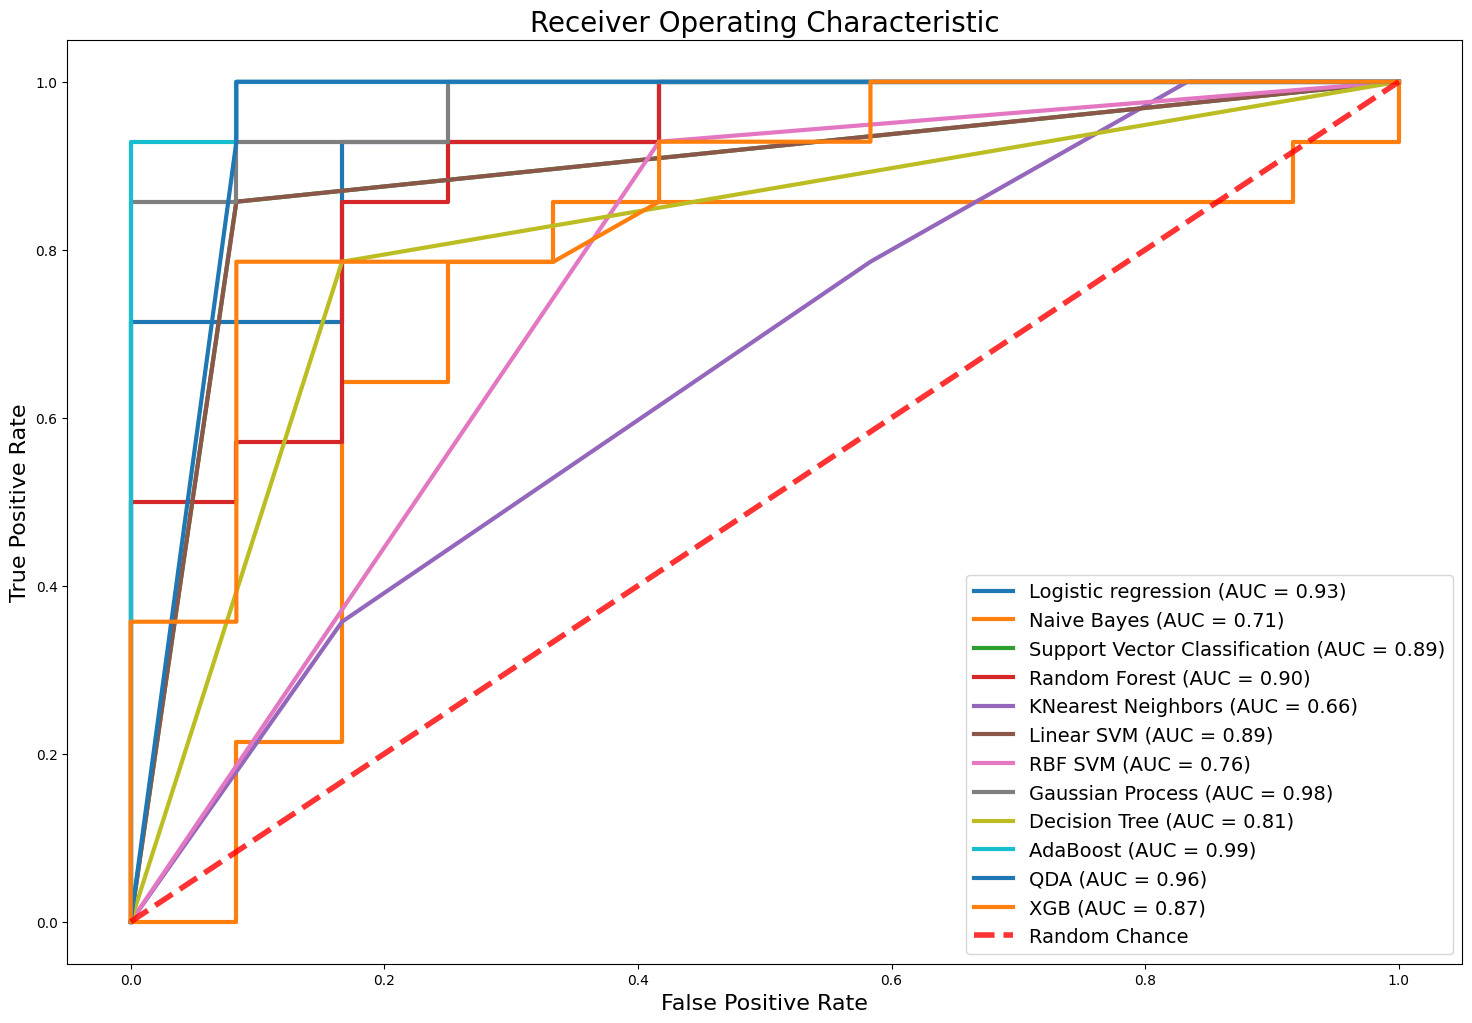

In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))

for clf, name in zip(classifiers, names):
    clf.fit(X_train, Y_train.ravel())  # use ravel() to reshape Y_train to a 1-dimensional array
    if hasattr(clf, "predict_proba"):
        results = clf.predict_proba(X_test)[:, 1]
    else:
        results = clf.predict(X_test)

    fpr, tpr, thresholds = roc_curve(Y_test, results)
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, lw=3, label=name+' (AUC = %0.2f)' % roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=4, color='r', label='Random Chance', alpha=.8)
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_title('Receiver Operating Characteristic', fontsize=20)
ax.legend(loc="lower right", fontsize=14)
plt.show()


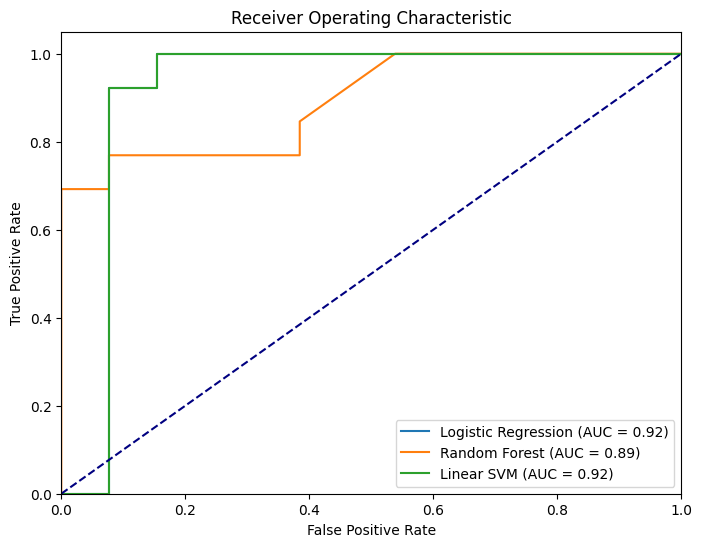

In [ ]:
from sklearn.metrics import roc_curve, auc

classifiers = [    LogisticRegression(),    RandomForestClassifier(),    LinearSVC()]

names = ["Logistic Regression", "Random Forest", "Linear SVM"]

fpr = dict()
tpr = dict()
roc_auc = dict()

for clf, name in zip(classifiers, names):
    clf.fit(X_train, Y_train)
    if hasattr(clf, "predict_proba"):
        results = clf.predict_proba(X_test)[:, 1]
    else:
        results = clf.decision_function(X_test)
    fpr[name], tpr[name], _ = roc_curve(Y_test, results)
    roc_auc[name] = auc(fpr[name], tpr[name])

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for name in names:
    plt.plot(fpr[name], tpr[name], label=f"{name} (AUC = {roc_auc[name]:.2f})")

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


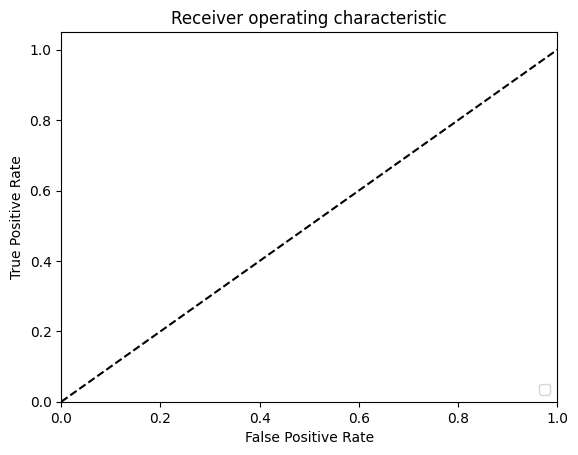

AttributeError: ignored

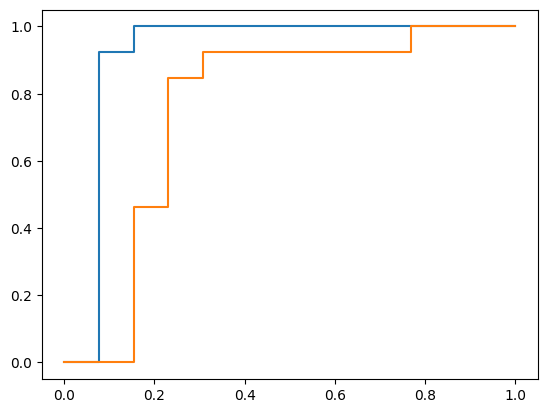

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for clf, name in zip(classifiers, names):
    clf.fit(X_train, Y_train)
    if hasattr(clf, "predict_proba"):
        results = clf.predict_proba(X_test)[:, 1]
    else:
        results = clf.decision_function(X_test)
    fpr[name], tpr[name], _ = roc_curve(Y_test, results)
    roc_auc[name] = auc(fpr[name], tpr[name])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
roc_auc = dict()
for clf, name in zip(classifiers, names):
    clf.fit(X_train, Y_train)
    results = clf.predict_proba(X_test)[:, 1]
    fpr[name], tpr[name], _ = roc_curve(Y_test, results)
    roc_auc[name] = auc(fpr[name], tpr[name])
    plt.plot(fpr[name], tpr[name], label=name+' (AUC = %0.3f)' % roc_auc[name])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Calculate ROC curve and AUC for each classifier
fpr = dict()
tpr = dict()
roc_auc = dict()
for clf, name in zip(classifiers, names):
    results = clf.predict_proba(X_test)[:, 1]
    fpr[name], tpr[name], _ = roc_curve(Y_test, results)
    roc_auc[name] = auc(fpr[name], tpr[name])

# Plot ROC curve for each classifier
plt.figure()
lw = 2
for name in names:
    plt.plot(fpr[name], tpr[name], lw=lw, label='ROC curve of %s (AUC = %0.2f)' % (name, roc_auc[name]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Print confusion matrix and classification report for each classifier
for clf, name in zip(classifiers, names):
    results = clf.predict(X_test)
    cm = confusion_matrix(Y_test, results)
    print(f"{name}:\nConfusion Matrix:\n{cm}\n")
    cr = classification_report(Y_test, results)
    print(f"Classification Report:\n{cr}\n")


NotFittedError: ignored

In [ ]:
df_metod = pd.DataFrame({'Method':names,'R2_train':r2_train,
                         'R2_test':r2_test,'R2_overall':r2_overall})
df_metod.sort_values(by='R2_test', ascending=False)

,Method,R2_train,R2_test,R2_overall
7,Gaussian Process,0.966102,0.9615,0.964706
2,Support Vector Classification,0.813559,0.9231,0.847059
6,RBF SVM,0.915254,0.9231,0.917647
0,Logistic regression,0.762712,0.8846,0.800000
5,Linear SVM,0.796610,0.8846,0.823529
10,Neural Net-MLP-Proposed,0.966102,0.8846,0.941176
13,XGB,1.000000,0.8846,0.964706
3,Random Forest,0.983051,0.8462,0.941176
4,KNearest Neighbors,0.915254,0.8462,0.894118
12,QDA,0.898305,0.8462,0.882353


This code uses the digits dataset from scikit-learn as an example. You can replace X and y with your own dataset. The code defines a ShuffleSplit cross-validation method with 10 splits and a test size of 20%. Then, it runs Monte Carlo cross-validation for each classifier by iterating over the splits, training the classifier on the training data, and computing the accuracy on the test data. Finally, it prints the mean accuracy across all splits for each classifier.

**Stratified k-fold cross-validation technique**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

classifiers = [
    LogisticRegression(),
    GaussianNB(),
    LinearSVC(C=1.0),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    KNeighborsClassifier(3),
    SVC(kernel="linear"),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(hidden_layer_sizes=(8,), max_iter=30000,learning_rate='constant',
                        learning_rate_init=0.1, momentum=0.075, solver= "sgd", batch_size=59, shuffle=False, tol=1e-10, random_state=seed_pi),
    MLPClassifier(activation= "relu", hidden_layer_sizes= (40, 30, 5), solver= "lbfgs" ,max_iter=10000),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier()]


# Initialize the StratifiedKFold object with 5 folds
skf = StratifiedKFold(n_splits=5)

# Loop through each classifier and fit and evaluate it on each fold
for clf in classifiers:
    acc_scores = []
    for train_index, test_index in skf.split(X, y):
        # Split the data into training and test sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the classifier to the training data
        clf.fit(X_train, y_train)

        # Make predictions on the test data and calculate the accuracy
        y_pred = clf.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        acc_scores.append(acc_score)

    # Print the average accuracy score across all folds
    print("Classifier:", type(clf).__name__)
    print("Average accuracy:", sum(acc_scores)/len(acc_scores))
    print("---------------------------------------------------")


NameError: ignored

 Monte Carlo cross-validation **technique** **bold text**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

n_samples = len(X)
n_splits = 5
test_size = 0.3
n_iterations = 10

classifiers = [
    LogisticRegression(max_iter=1000),
    GaussianNB(),
    LinearSVC(C=1.0),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    KNeighborsClassifier(3),
    SVC(kernel="linear"),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(hidden_layer_sizes=(8,), max_iter=30000,learning_rate='constant',
                        learning_rate_init=0.1, momentum=0.075, solver= "sgd", batch_size=59, shuffle=False, tol=1e-10, random_state=seed_pi),
    MLPClassifier(activation= "relu", hidden_layer_sizes= (40, 30, 5), solver= "lbfgs" ,max_iter=10000),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(), XGBClassifier()]

for clf in classifiers:
    clf_name = clf.__class__.__name__
    cv_scores = []
    for i in range(n_iterations):
        cv = ShuffleSplit(n_splits=n_splits, test_size=test_size)
        scores = cross_val_score(clf, X, y, cv=cv)
        cv_scores.append(scores.mean())
    print(f"{clf_name}: {np.mean(cv_scores):.3f} ({np.std(cv_scores):.3f})")


NameError: ignored

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

classifiers = [
    LogisticRegression(max_iter=1000),
    GaussianNB(),
    LinearSVC(C=1.0),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    KNeighborsClassifier(3),
    SVC(kernel="linear"),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(hidden_layer_sizes=(8,), max_iter=30000,learning_rate='constant',
                        learning_rate_init=0.1, momentum=0.075, solver= "sgd", batch_size=59, shuffle=False, tol=1e-10, random_state=seed_pi),
    MLPClassifier(activation= "relu", hidden_layer_sizes= (40, 30, 5), solver= "lbfgs" ,max_iter=10000),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(), XGBClassifier()]

for clf in classifiers:
    clf_name = clf.__class__.__name__
    loo = LeaveOneOut()
    scores = cross_val_score(clf, X, y, cv=loo)
    print(f"{clf_name}: {scores.mean():.3f} ({scores.std():.3f})")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

classifiers = [
    LogisticRegression(max_iter=1000),
    GaussianNB(),
    LinearSVC(C=1.0),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    KNeighborsClassifier(3),
    SVC(kernel="linear"),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(hidden_layer_sizes=(8,), max_iter=30000,learning_rate='constant',
                        learning_rate_init=0.1, momentum=0.075, solver= "sgd", batch_size=59, shuffle=False, tol=1e-10, random_state=seed_pi),
    MLPClassifier(activation= "relu", hidden_layer_sizes= (40, 30, 5), solver= "lbfgs" ,max_iter=10000),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(), XGBClassifier()]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot ROC curves for each classifier
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    plot_roc_curve(clf, X_test, y_test, name=clf_name, ax=ax)

ax.set_title('Receiver Operating Characteristic')
ax.legend()
plt.show()


In [ ]:
import pandas as pd

# Load the data from a CSV file
data = pd.read_csv('lichefiere.csv')

# Split the data into features and outcome
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Convert the outcome to one-hot encoding for classification
y = pd.get_dummies(y)


# **back propogation**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Load the data from a CSV file
data = pd.read_csv('lichefiere.csv')

# Split the data into features and outcome
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Convert the outcome to one-hot encoding for classification
y = pd.get_dummies(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the number of neurons for each layer
input_neurons = X.shape[1]
hidden_neurons = 128
output_neurons = y.shape[1]

# Define the activation function for each layer
activation = 'softplus'

# Initialize the network
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(hidden_neurons, input_dim=input_neurons, activation=activation))

# Add additional hidden layers
model.add(Dense(128, activation=activation))
model.add(Dense(128, activation=activation))
model.add(Dense(128, activation=activation))

# Add the output layer
model.add(Dense(output_neurons, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)


# Resnet

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Activation, Flatten, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load the data
data = np.loadtxt('data.csv', delimiter=',', skiprows=1)
X = data[:, :8]
y = data[:, 8:]

# Reshape the input data
X = X.reshape(-1, 8, 1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define input shape
input_shape = (8, 1, 1)
num_classes = 2

# Define the input layer
inputs = Input(shape=input_shape)

# Define the convolutional block
x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Define the residual blocks
def res_block(x, filters, kernel_size, stride):
    res = x
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([res, x])
    x = Activation('relu')(x)
    return x

x = res_block(x, filters=64, kernel_size=3, stride=1)
x = res_block(x, filters=64, kernel_size=3, stride=1)
x = res_block(x, filters=64, kernel_size=3, stride=1)

x = res_block(x, filters=128, kernel_size=3, stride=2)
x = res_block(x, filters=128, kernel_size=3, stride=1)
x = res_block(x, filters=128, kernel_size=3, stride=1)

x = res_block(x, filters=256, kernel_size=3, stride=2)
x = res_block(x, filters=256, kernel_size=3, stride=1)
x = res_block(x, filters=256, kernel_size=3, stride=1)

x = res_block(x, filters=512, kernel_size=3, stride=2)
x = res_block(x, filters=512, kernel_size=3, stride=1)
x = res_block(x, filters=512, kernel_size=3, stride=1)

# Output layer
x = AveragePooling2D(pool_size=(2, 1))(x)
x = Flatten()(x)
outputs = Dense(num_classes, activation='softmax')(x


In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Activation, Flatten, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define input shape
input_shape = (8, 1, 1)
num_classes = 2

# Define the input layer
inputs = Input(shape=input_shape)

# Define the convolutional block
x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)



In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Input, Flatten, Add, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

def residual_block(x, filters, kernel_size=3, strides=1, activation='relu'):
    # Convolutional layer 1
    conv1 = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same', activation=activation)(x)
    # Batch normalization 1
    batch_norm1 = BatchNormalization()(conv1)
    # Convolutional layer 2
    conv2 = Conv2D(filters=filters, kernel_size=kernel_size, strides=1, padding='same', activation=activation)(batch_norm1)
    # Batch normalization 2
    batch_norm2 = BatchNormalization()(conv2)
    # Shortcut connection
    shortcut = x if strides == 1 else Conv2D(filters=filters, kernel_size=1, strides=strides, padding='same')(x)
    # Add the shortcut to the output of the batch normalization
    res_block_output = Add()([batch_norm2, shortcut])
    return res_block_output

def build_resnet(input_shape, num_classes):
    # Input layer
    input_layer = Input(shape=input_shape)
    # Convolutional layer 1
    conv1 = Conv2D(filters=64, kernel_size=7, strides=2, padding='same', activation='relu')(input_layer)
    # Max pooling layer 1
    max_pool1 = MaxPooling2D(pool_size=3, strides=2, padding='same')(conv1)
    # Residual block 1
    res_block1 = residual_block(max_pool1, filters=64, strides=1)
    # Residual block 2
    res_block2 = residual_block(res_block1, filters=64, strides=1)
    # Average pooling layer
    avg_pool = AveragePooling2D(pool_size=7, strides=1, padding='valid')(res_block2)
    # Flatten layer
    flatten = Flatten()(avg_pool)
    # Fully connected layer
    fc = Dense(units=num_classes, activation='softmax')(flatten)
    # Create the model
    model = Model(inputs=input_layer, outputs=fc)
    return model

# Build the model
model = build_resnet(input_shape=(8, 1, 1), num_classes=2)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Add

# Load the data from a CSV file
data = pd.read_csv('lichefiere.csv')

# Split the data into features and outcome
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Convert the outcome to one-hot encoding for classification
y = pd.get_dummies(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the number of neurons for each layer
input_neurons = X.shape[1]
hidden_neurons = 128
output_neurons = y.shape[1]

# Define the activation function for each layer
activation = 'relu'

# Define input layer
inputs = Input(shape=(input_neurons,))

# Initialize the network
x = Dense(hidden_neurons, activation=activation)(inputs)

# Add residual connection
residual = x
x = Dense(128, activation=activation)(x)
x = Dense(128, activation=activation)(x)
x = Dense(128, activation=activation)(x)
x = Add()([x, residual])

# Add the output layer
outputs = Dense(output_neurons, activation='softmax')(x)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)
